In [1]:
from unicodedata import east_asian_width
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('CleanDF.csv')
del df[df.columns[0]]
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
0,2018-01-01 00:00:00,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
1,2018-01-01 01:00:00,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
2,2018-01-01 02:00:00,29.0,25.0,10.0,11.6,5.1,16.7,5.6,0.92,723.2,88.0,7.39,0.001,15.3,43.0,0.0
3,2018-01-01 03:00:00,26.0,18.0,8.0,9.5,4.3,13.6,5.6,0.92,723.4,90.0,6.37,0.001,13.0,48.0,0.0
4,2018-01-01 04:00:00,5.0,11.0,8.0,10.7,4.5,15.0,5.6,0.92,723.8,94.0,5.42,0.001,13.3,48.0,0.0


In [3]:
day_df = df.groupby(pd.Grouper(key='date', axis=0, freq='D')).mean()
day_df.head()

,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
date,,,,,,,,,,,,,,,
2018-01-01,16.708333,7.833333,10.500000,20.170833,6.775000,26.604167,5.6,0.92,725.358333,90.708333,2.910833,0.022583,11.775000,51.291667,0.001250
2018-01-02,31.333333,13.708333,7.375000,42.754167,17.204167,59.037500,5.6,0.92,723.241667,95.541667,0.858750,0.016417,6.308333,75.250000,0.001667
2018-01-03,60.583333,16.666667,10.916667,62.720833,22.862500,84.795833,5.6,0.92,723.762500,73.375000,4.810000,0.109875,6.875000,71.125000,0.000000
2018-01-04,87.583333,29.500000,16.083333,60.962500,26.304167,86.033333,5.6,0.92,720.462500,55.125000,8.817500,0.144083,6.054167,173.750000,0.000000
2018-01-05,82.083333,29.208333,16.333333,36.108333,29.508333,65.400000,5.6,0.92,720.233333,65.083333,11.551667,0.117500,5.758333,95.208333,0.000000


In [4]:
day_df.to_csv('DatosDiarios.csv')

In [5]:
def graficar(df):
    fig, ax = plt.subplots(15, figsize=(15,30))
    fig.tight_layout()

    x = range(len(df))
    inde=0
    for i in range(15):
            ax[i].set_title(df.columns[inde])
            ax[i].plot(x, df[df.columns[inde]], linewidth=0.8)
            inde += 1

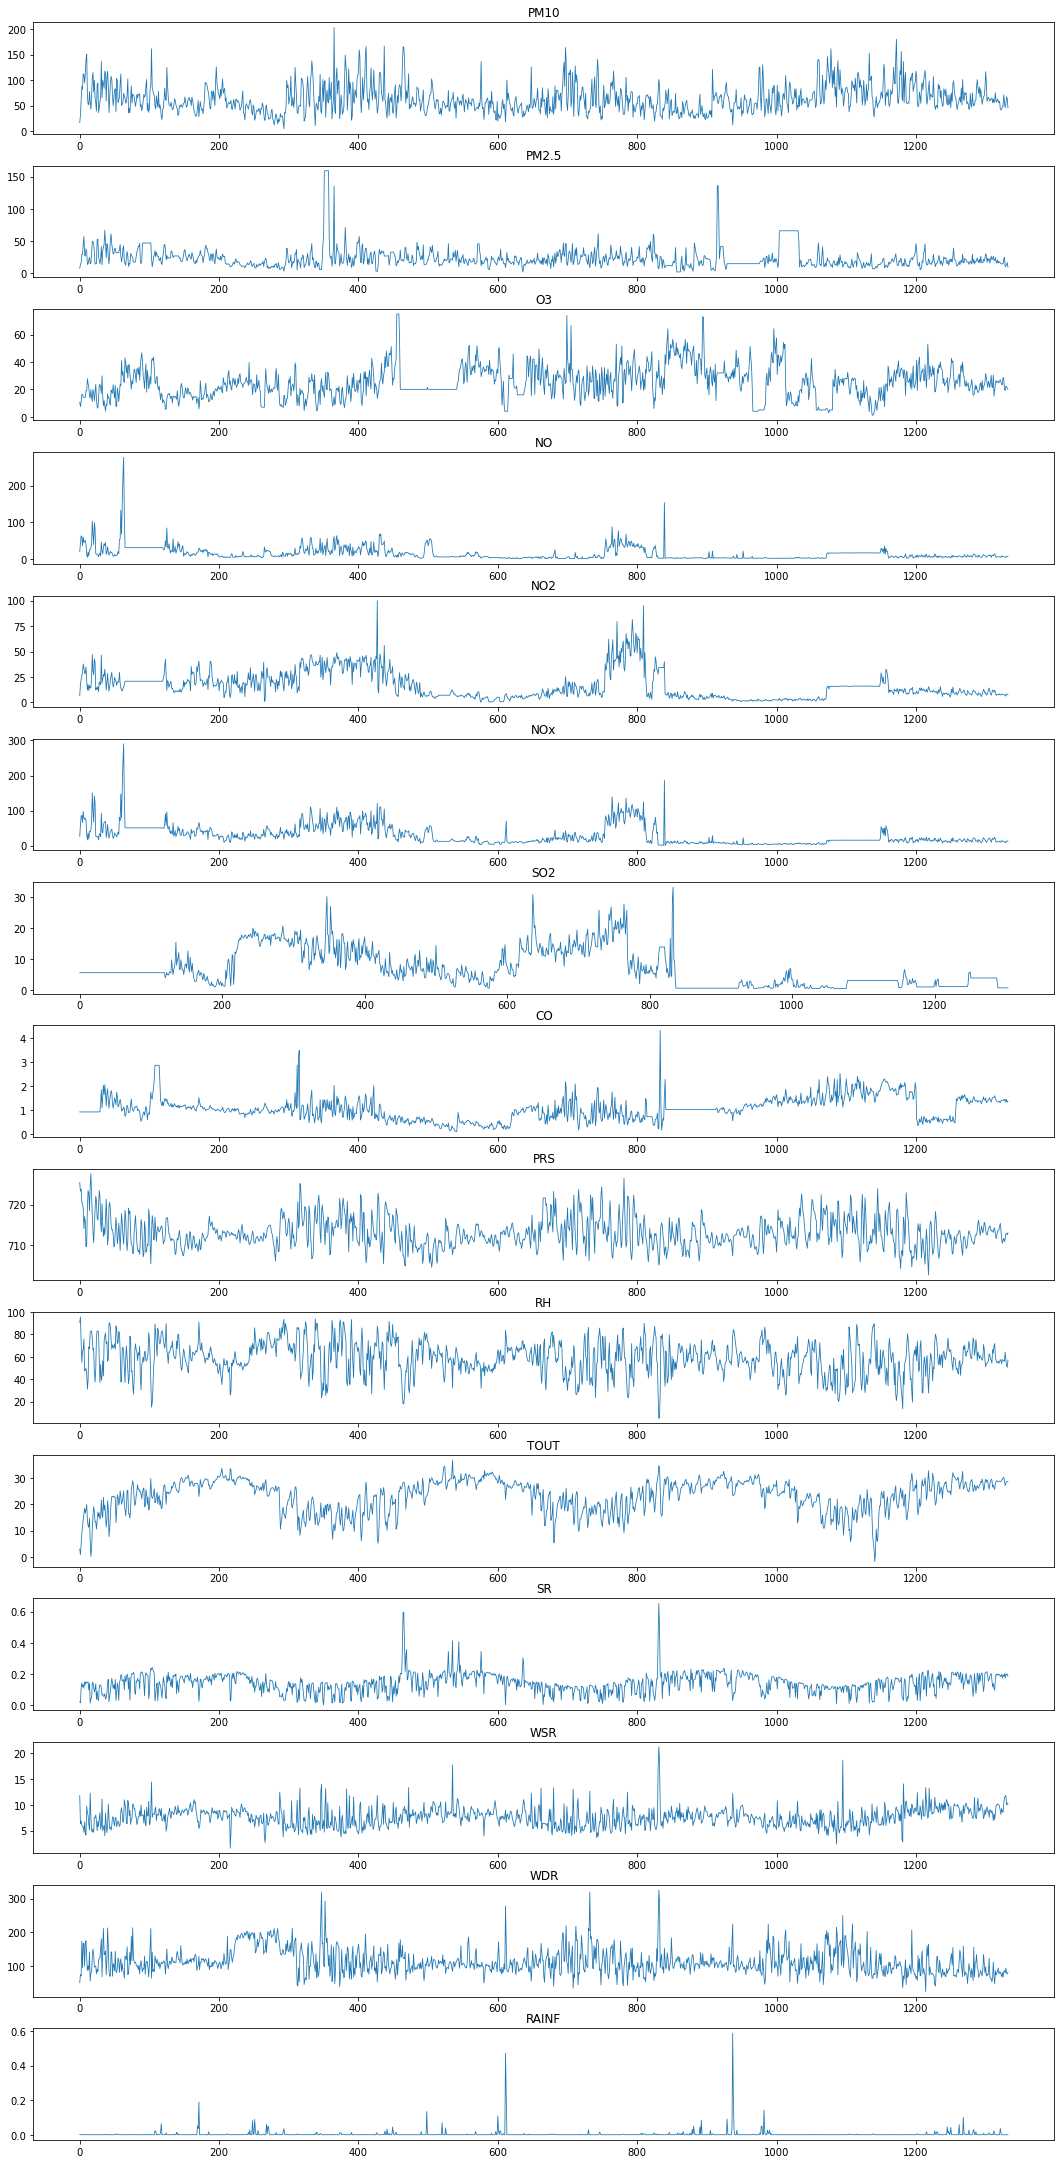

In [6]:
graficar(day_df)

In [7]:
df['dia'] = df['date'].dt.day_of_week
df['mes'] = df['date'].dt.month
df['hora'] = df['date'].dt.hour
df['año'] = df['date'].dt.year

df = df[['date', 'hora', 'dia', 'mes',  'año', 'PM10', 'PM2.5', 'O3', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'PRS',
       'RH', 'TOUT', 'SR', 'WSR', 'WDR', 'RAINF']]
del df['date']
df.head()

,hora,dia,mes,año,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
0,0,0,1,2018,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
1,1,0,1,2018,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
2,2,0,1,2018,29.0,25.0,10.0,11.6,5.1,16.7,5.6,0.92,723.2,88.0,7.39,0.001,15.3,43.0,0.0
3,3,0,1,2018,26.0,18.0,8.0,9.5,4.3,13.6,5.6,0.92,723.4,90.0,6.37,0.001,13.0,48.0,0.0
4,4,0,1,2018,5.0,11.0,8.0,10.7,4.5,15.0,5.6,0.92,723.8,94.0,5.42,0.001,13.3,48.0,0.0


In [8]:
def graficarGrupos(df):
    rows = ['PM10', 'PM2.5', 'O3', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'PRS', 'RH', 'TOUT', 'SR', 'WSR', 'WDR', 'RAINF']
    fig, ax = plt.subplots(len(df), figsize=(15,30))
    fig.tight_layout()
    
    x = range(len(df.columns))
    for i in range(len(df)):
        ax[i].set_title(rows[i])
        ax[i].plot(x, df.iloc[i])

## Agrupando por horas del dia

In [9]:
hour_group = df.groupby('hora')

dfHoras = pd.DataFrame(hour_group.get_group(0).mean())
dfHoras.columns = [0]

for i in range(1,24):
    dfHoraK = pd.DataFrame(hour_group.get_group(i).mean())
    dfHoraK.columns = [i]
    dfHoras = pd.concat([dfHoras, dfHoraK], axis = 1)

dfHoras.drop(index = ['hora', 'dia', 'mes', 'año'], inplace=True)
dfHoras

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
PM10,60.530781,58.163541,55.527382,53.709677,52.401350,53.147037,56.086401,61.075019,67.524381,74.542793,...,68.595041,64.501125,62.174794,60.631381,60.464662,60.209302,58.937641,60.109527,62.097598,61.911411
PM2.5,25.353724,25.189872,25.146542,24.326542,23.738132,23.191335,23.660977,24.275124,23.326939,22.116299,...,21.144726,21.151073,21.735394,22.284752,23.113594,23.819520,23.240210,23.740893,24.940248,25.480758
O3,20.006006,19.498875,18.908477,18.063016,17.040510,15.694674,13.788129,12.177794,12.328582,15.018769,...,43.247183,43.818455,42.180795,38.528529,33.953418,28.665416,24.751502,22.692423,21.548048,20.768018
NO,13.567718,13.582446,13.258215,12.978920,12.902251,13.597824,16.133509,20.367742,23.021755,22.133559,...,10.982945,10.941260,10.906377,10.722973,11.186326,11.527832,12.091967,13.215079,13.930180,14.064264
NO2,15.058709,14.844186,14.641785,14.471493,14.645386,15.697899,17.315101,19.148312,20.558440,22.196396,...,15.111119,13.901875,13.242611,13.022447,13.375131,14.336084,15.307583,15.759190,15.923649,15.650751
NOx,27.213063,26.866017,26.392273,25.733758,25.739385,27.389947,31.503606,37.644111,42.084846,43.226952,...,25.133283,23.780870,22.960990,22.424249,23.312246,24.765341,26.254279,27.895424,28.613213,28.387462
SO2,7.518035,7.588420,7.465721,7.389494,7.299310,7.242331,7.198925,7.241028,7.248236,7.176899,...,6.302842,6.381212,6.539187,6.696009,6.871791,7.087883,7.145315,7.196319,7.330852,7.508909
CO,1.051502,1.025926,0.989070,0.951575,0.927119,0.931020,0.985680,1.099227,1.218275,1.278311,...,1.036273,1.000188,0.974291,0.971306,0.991233,1.023136,1.047964,1.063758,1.070983,1.071509
PRS,713.575826,713.450413,713.276969,713.082221,712.969692,713.006302,713.203381,713.538560,713.925731,714.256456,...,712.850488,712.308927,711.928657,711.778153,711.837143,712.089047,712.504884,712.929707,713.323574,713.550901
RH,63.908408,66.753938,69.330083,71.456114,72.978995,73.806452,74.281743,73.902476,71.578395,67.075075,...,45.157025,43.575394,42.957989,43.481231,45.188722,47.765191,50.511645,53.412603,56.776276,60.360360


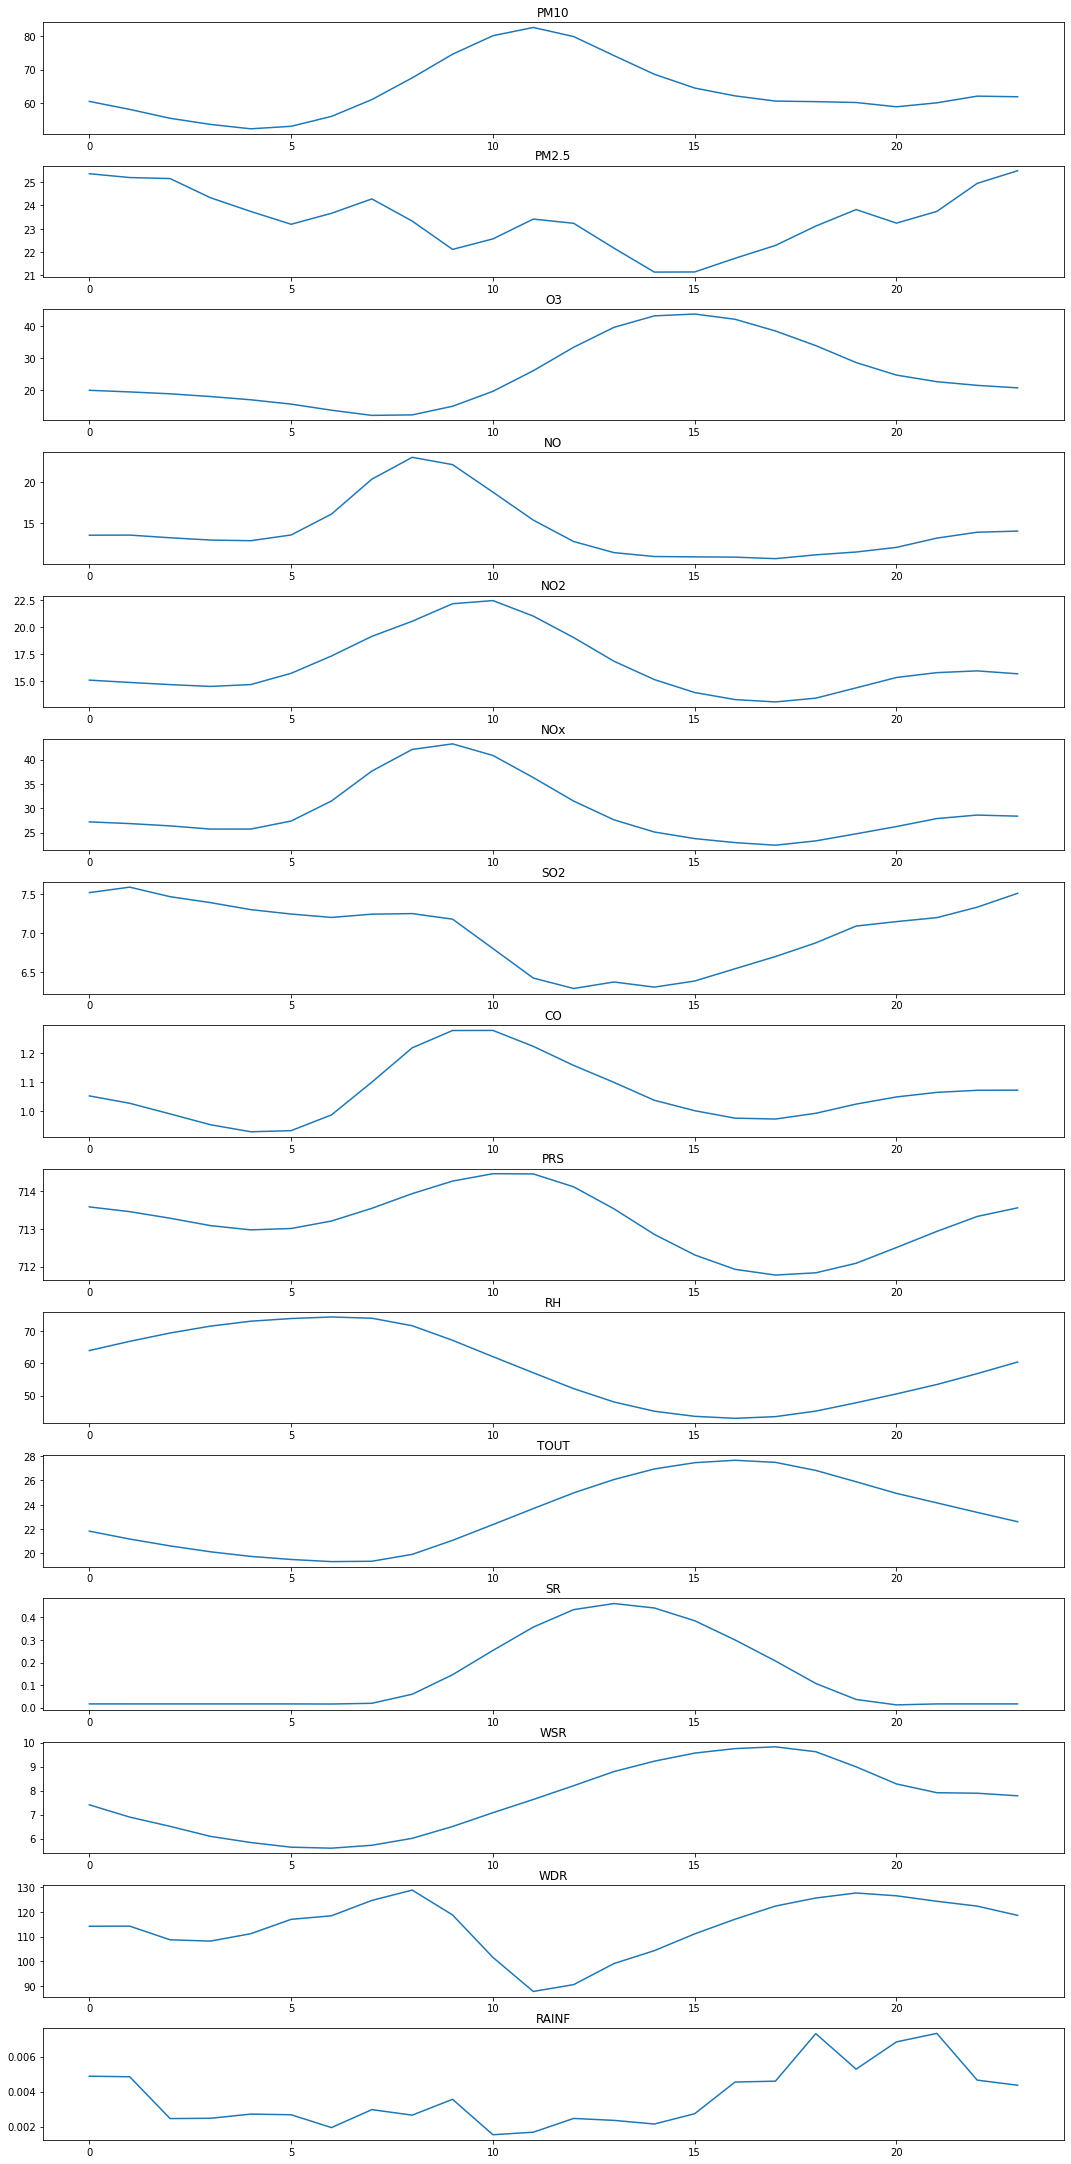

In [10]:
graficarGrupos(dfHoras)

In [11]:
df[df.columns[4:]]

,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
0,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
1,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
2,29.0,25.0,10.0,11.6,5.1,16.7,5.6,0.92,723.2,88.0,7.39,0.001,15.3,43.0,0.0
3,26.0,18.0,8.0,9.5,4.3,13.6,5.6,0.92,723.4,90.0,6.37,0.001,13.0,48.0,0.0
4,5.0,11.0,8.0,10.7,4.5,15.0,5.6,0.92,723.8,94.0,5.42,0.001,13.3,48.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,42.0,3.0,14.0,3.8,9.8,11.6,NaN,1.42,712.8,51.0,29.29,NaN,12.0,89.0,0.0
31974,29.0,3.0,18.0,2.7,8.1,8.8,NaN,1.36,713.2,53.0,28.61,NaN,11.4,98.0,0.0
31975,40.0,10.0,16.0,3.2,9.6,10.8,NaN,1.53,713.6,57.0,27.98,NaN,11.8,88.0,0.0
31976,NaN,35.0,56.0,2.7,4.1,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Agrupando por dia de la semana 


In [12]:
day_group = df.groupby('dia')

dfDias = pd.DataFrame(day_group.get_group(0).mean())
dfDias.columns = [0]

for i in range(1,7):
    dfDiaK = pd.DataFrame(day_group.get_group(i).mean())
    dfDiaK.columns = [i]
    dfDias = pd.concat([dfDias, dfDiaK], axis = 1)

dfDias.drop(index = ['hora', 'dia', 'mes', 'año'], inplace=True)
dfDias

,0,1,2,3,4,5,6
PM10,61.189219,63.942988,65.846910,67.589035,66.867076,63.675148,56.778021
PM2.5,23.122529,23.528423,23.726231,23.683577,23.409480,23.257677,23.293066
O3,24.717809,24.919415,24.582314,24.110526,24.572275,25.432770,27.126563
NO,15.102903,14.724350,13.136747,14.278531,13.753060,14.264510,13.779074
NO2,16.605522,16.835925,16.552817,17.245614,16.726146,16.506383,14.324633
NOx,30.365779,30.191832,28.703712,30.798794,29.193595,29.579601,26.377912
SO2,6.819661,6.845994,6.895044,7.056676,7.190410,7.133027,7.148644
CO,1.087608,1.062927,1.057235,1.059612,1.083983,1.061564,1.014514
PRS,713.094086,713.202512,713.135597,713.302741,713.425817,713.072275,712.909498
RH,57.911174,59.984709,60.190435,58.972807,58.342838,58.410178,58.461285


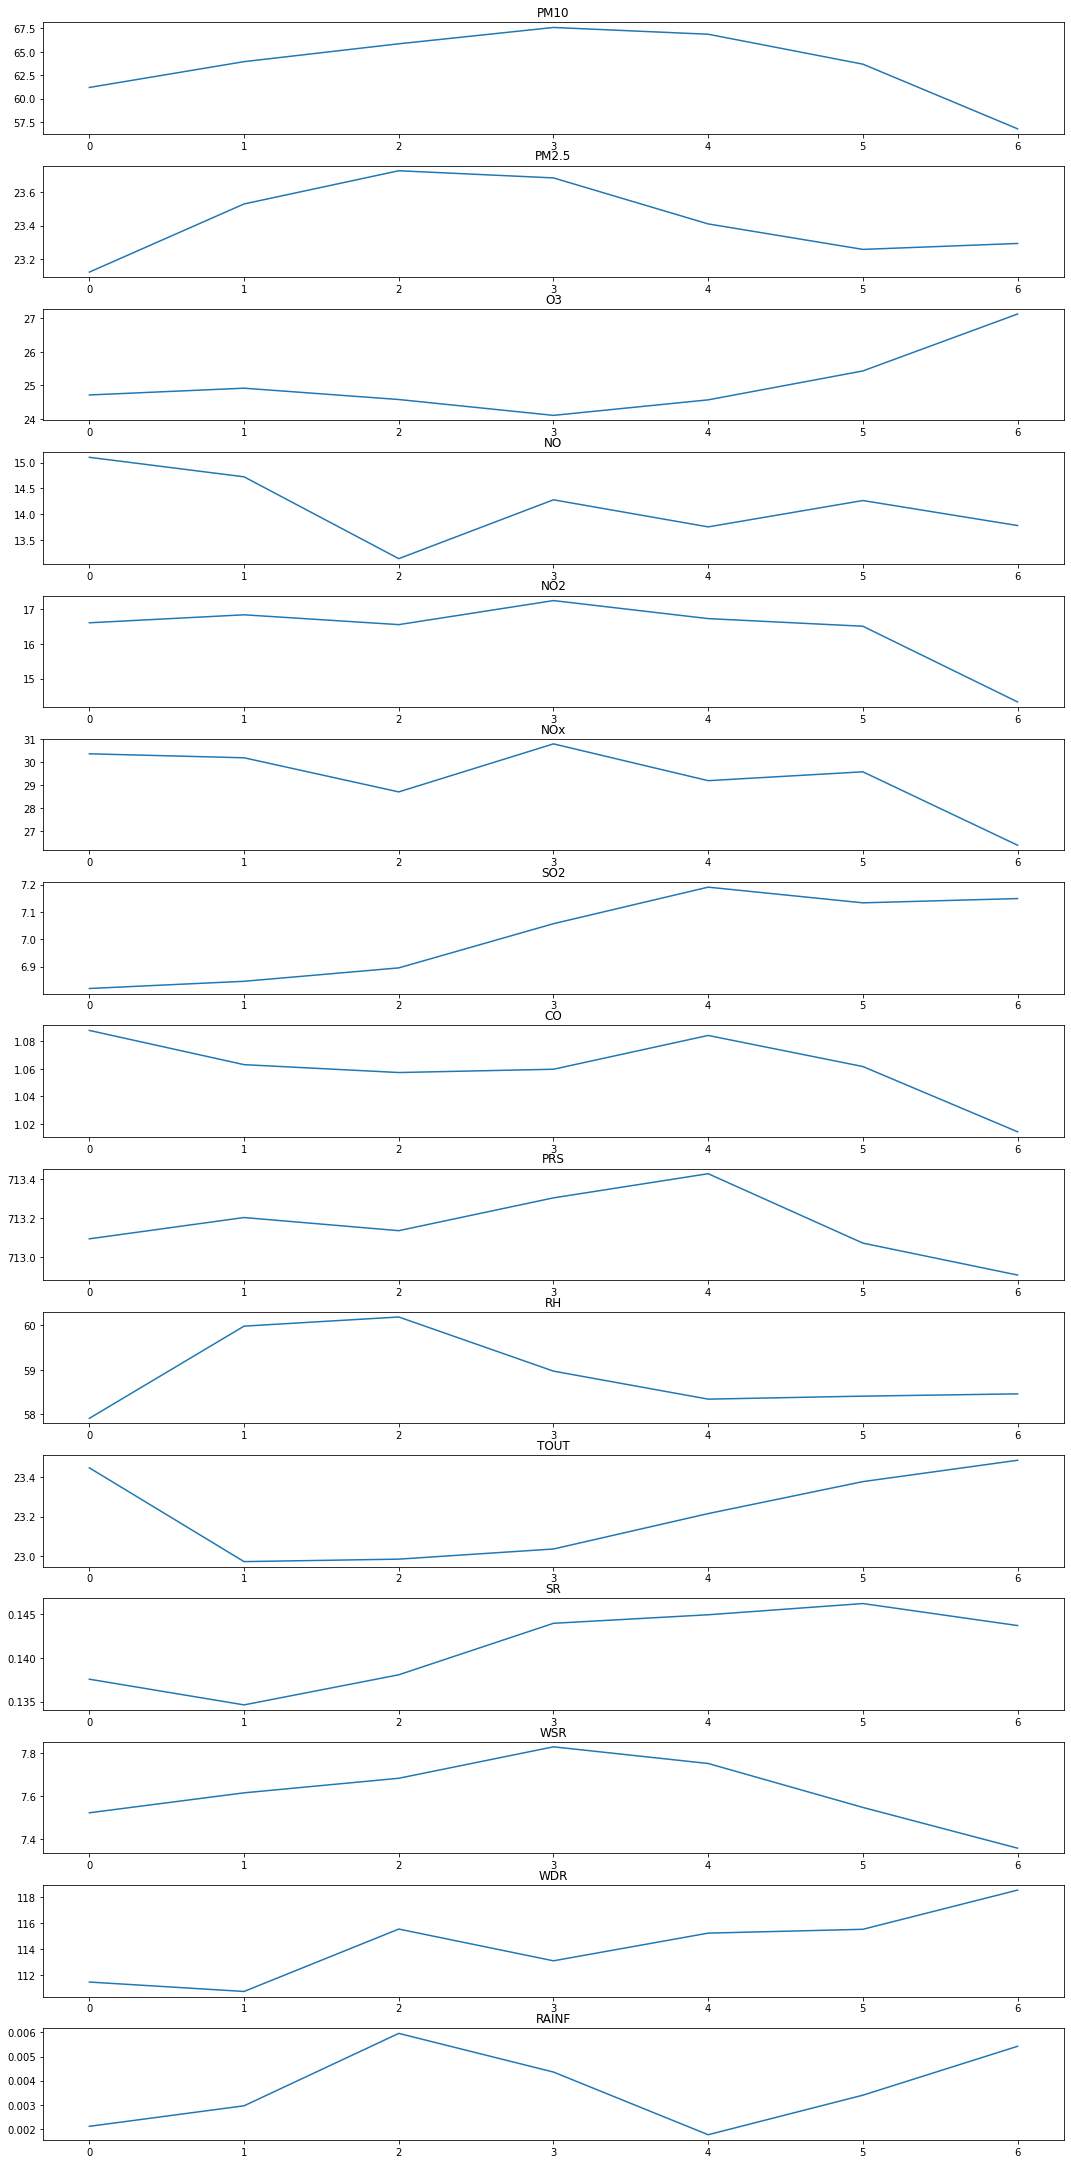

In [13]:
graficarGrupos(dfDias)

## Agrupando por mes 

In [14]:
mes_group = df.groupby('mes')

dfMeses = pd.DataFrame(mes_group.get_group(1).mean())
dfMeses.columns = [1]

for i in range(2,13):
    dfMesK = pd.DataFrame(mes_group.get_group(i).mean())
    dfMesK.columns = [i]
    dfMeses = pd.concat([dfMeses, dfMesK], axis = 1)

dfMeses.drop(index = ['hora', 'dia', 'mes', 'año'], inplace=True)
dfMeses

,1,2,3,4,5,6,7,8,9,10,11,12
PM10,73.783793,78.641962,68.536290,68.443518,55.600874,51.997219,65.304772,50.146540,52.033812,52.211022,69.566204,77.580602
PM2.5,23.772340,26.502581,23.523233,24.172402,21.080000,21.485471,24.510753,16.503531,17.014358,31.509857,21.093519,31.573722
O3,19.864492,20.335177,31.518481,29.553162,27.940504,25.321863,27.489919,26.821681,22.165818,24.155018,21.610648,20.775034
NO,23.189677,27.389712,28.982258,15.524844,14.609277,8.004762,7.784677,5.046257,4.889115,5.375000,10.265370,13.289897
NO2,23.993141,31.415560,26.935853,18.136379,10.245580,11.489746,9.888575,7.656992,9.519453,10.487366,14.714954,20.267984
NOx,44.189677,55.361173,55.036290,30.057366,23.596773,18.669065,16.439449,12.414866,16.127189,16.687231,26.585278,30.605478
SO2,10.115434,7.891482,5.528360,5.099235,3.918325,3.688460,2.401181,7.494400,10.908245,10.526299,9.271204,10.669600
CO,1.180064,1.318577,1.097856,1.064522,0.836463,0.905075,0.956331,0.916610,1.006253,1.133042,1.216792,1.190233
PRS,716.499193,713.883850,713.522480,711.482377,710.807532,711.473931,712.598185,712.210099,712.650764,713.482437,715.229444,714.989582
RH,60.135844,60.130531,57.320901,55.922836,62.754876,59.673618,56.963038,54.414901,66.905512,62.548835,62.361574,49.032780


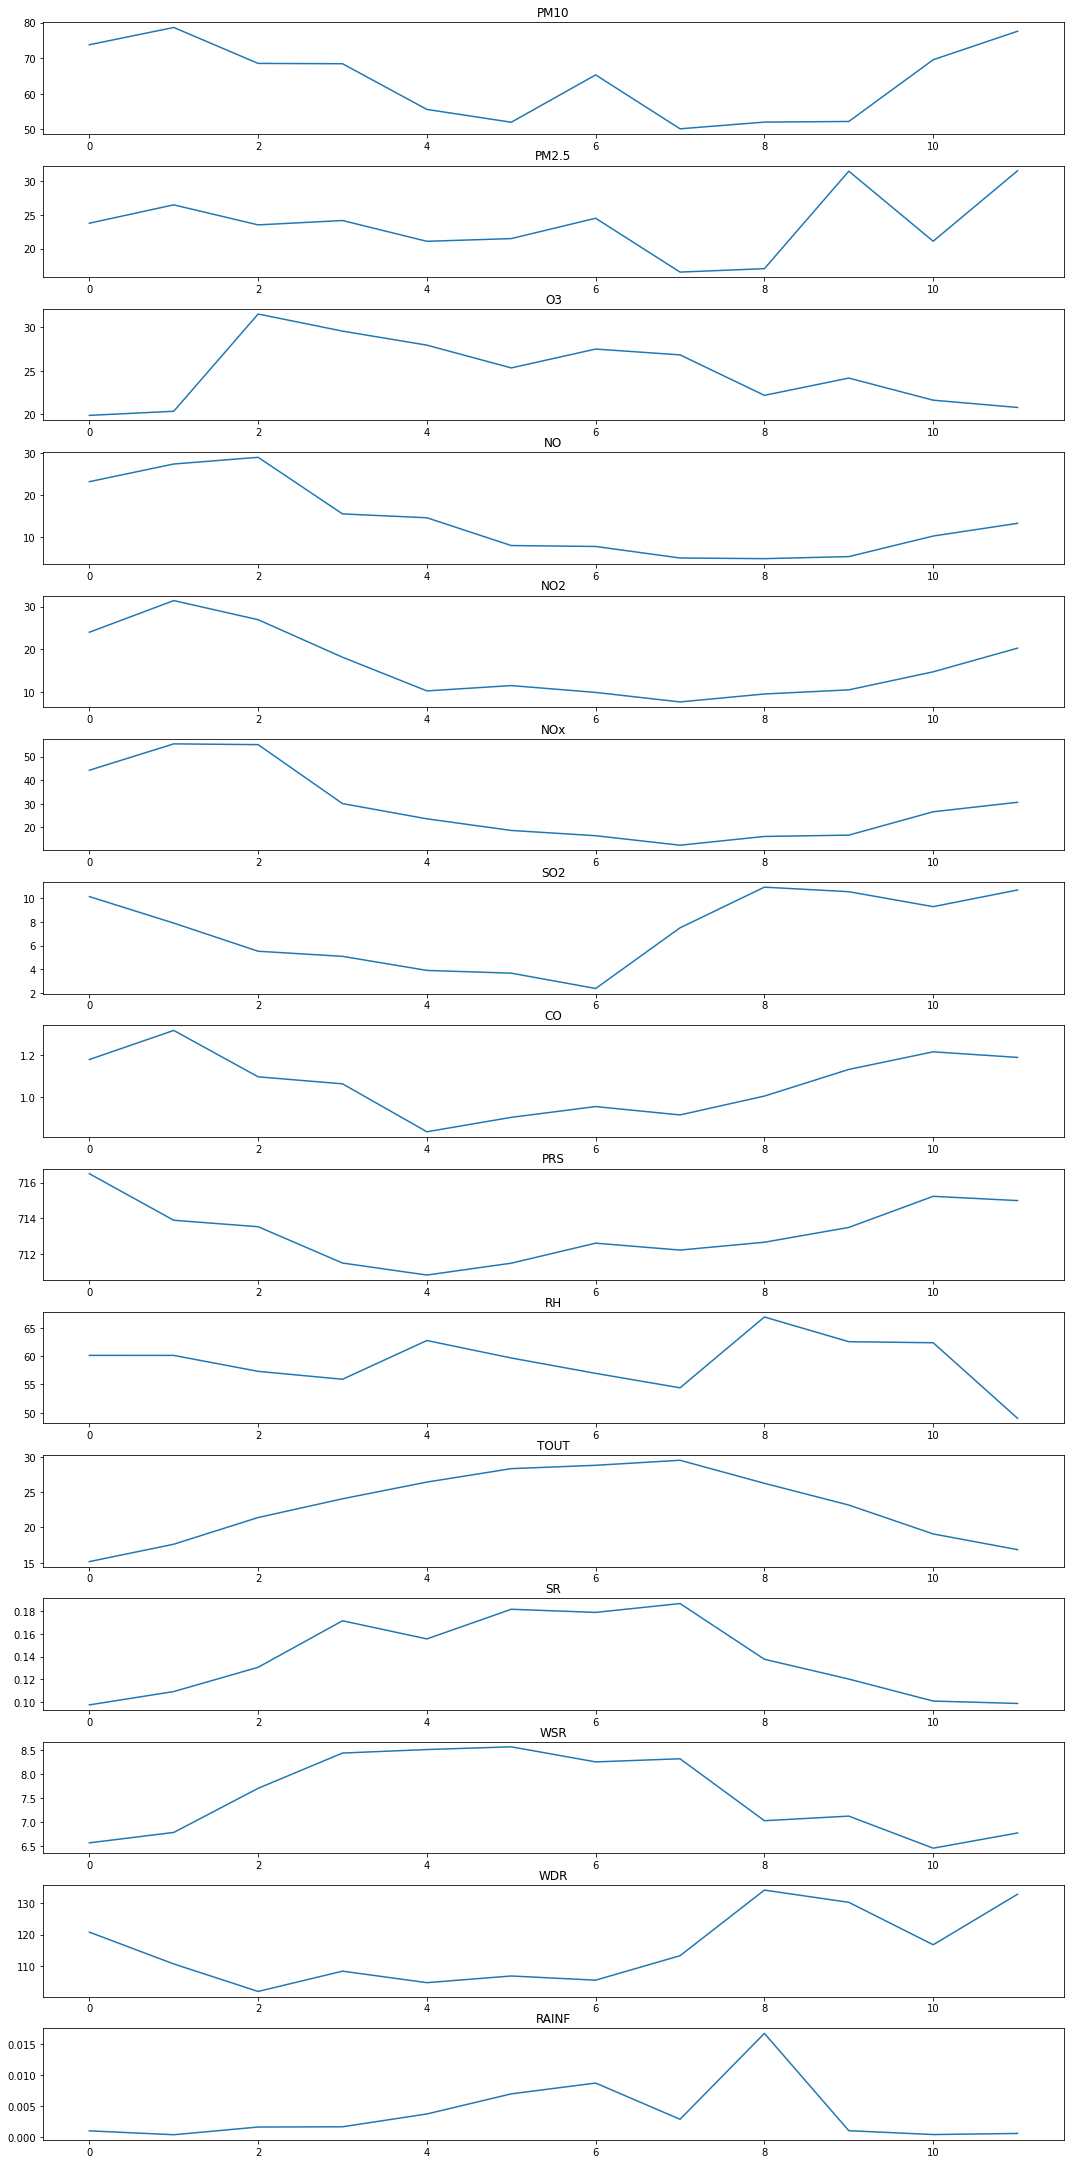

In [15]:
graficarGrupos(dfMeses)

# Estandarizando las columnas

In [16]:
def graficar(df):
    fig, ax = plt.subplots(len(df.columns)-1-3, figsize=(15,30))
    fig.tight_layout()

    x = range(len(df))
    inde=1
    for i in range(len(df.columns)-1-3):
            ax[i].set_title(df.columns[inde+3])
            ax[i].plot(x, df[df.columns[inde+3]], linewidth=0.2)
            inde += 1

In [17]:
s_array = StandardScaler().fit_transform(df[df.columns[4:]])
sdf = pd.DataFrame(s_array, columns = df.columns[4:])
sdf = pd.concat([df[df.columns[:4]], sdf], axis = 1)
sdf

,hora,dia,mes,año,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
0,0,0,1,2018,-1.117455,0.077010,-0.734535,-0.188352,-0.829853,-0.513578,-0.210925,-0.245305,2.514699,1.476532,-2.158259,-0.728518,2.467517,-0.919085,-0.069167
1,1,0,1,2018,-1.117455,0.077010,-0.734535,-0.188352,-0.829853,-0.513578,-0.210925,-0.245305,2.514699,1.476532,-2.158259,-0.728518,2.467517,-0.919085,-0.069167
2,2,0,1,2018,-0.887306,0.077010,-0.786758,-0.107911,-0.694619,-0.374187,-0.210925,-0.245305,2.565827,1.427482,-2.235961,-0.728518,2.404929,-0.932155,-0.069167
3,3,0,1,2018,-0.964023,-0.266698,-0.891204,-0.196820,-0.743795,-0.466125,-0.210925,-0.245305,2.616956,1.525581,-2.380063,-0.728518,1.685167,-0.866806,-0.069167
4,4,0,1,2018,-1.501038,-0.610406,-0.891204,-0.146015,-0.731501,-0.424605,-0.210925,-0.245305,2.719212,1.721778,-2.514276,-0.728518,1.779049,-0.866806,-0.069167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,21,2,8,2021,-0.554868,-1.003215,-0.577865,-0.438143,-0.405710,-0.525441,NaN,0.624070,-0.092844,-0.387340,0.857990,NaN,1.372227,-0.330948,-0.069167
31974,22,2,8,2021,-0.887306,-1.003215,-0.368971,-0.484714,-0.510209,-0.608482,NaN,0.519745,0.009413,-0.289241,0.761923,NaN,1.184462,-0.213320,-0.069167
31975,23,2,8,2021,-0.606013,-0.659507,-0.473418,-0.463546,-0.418004,-0.549167,NaN,0.815332,0.111670,-0.093044,0.672918,NaN,1.309638,-0.344017,-0.069167
31976,20,2,5,2019,NaN,0.568021,1.615514,-0.484714,-0.756089,-0.667798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


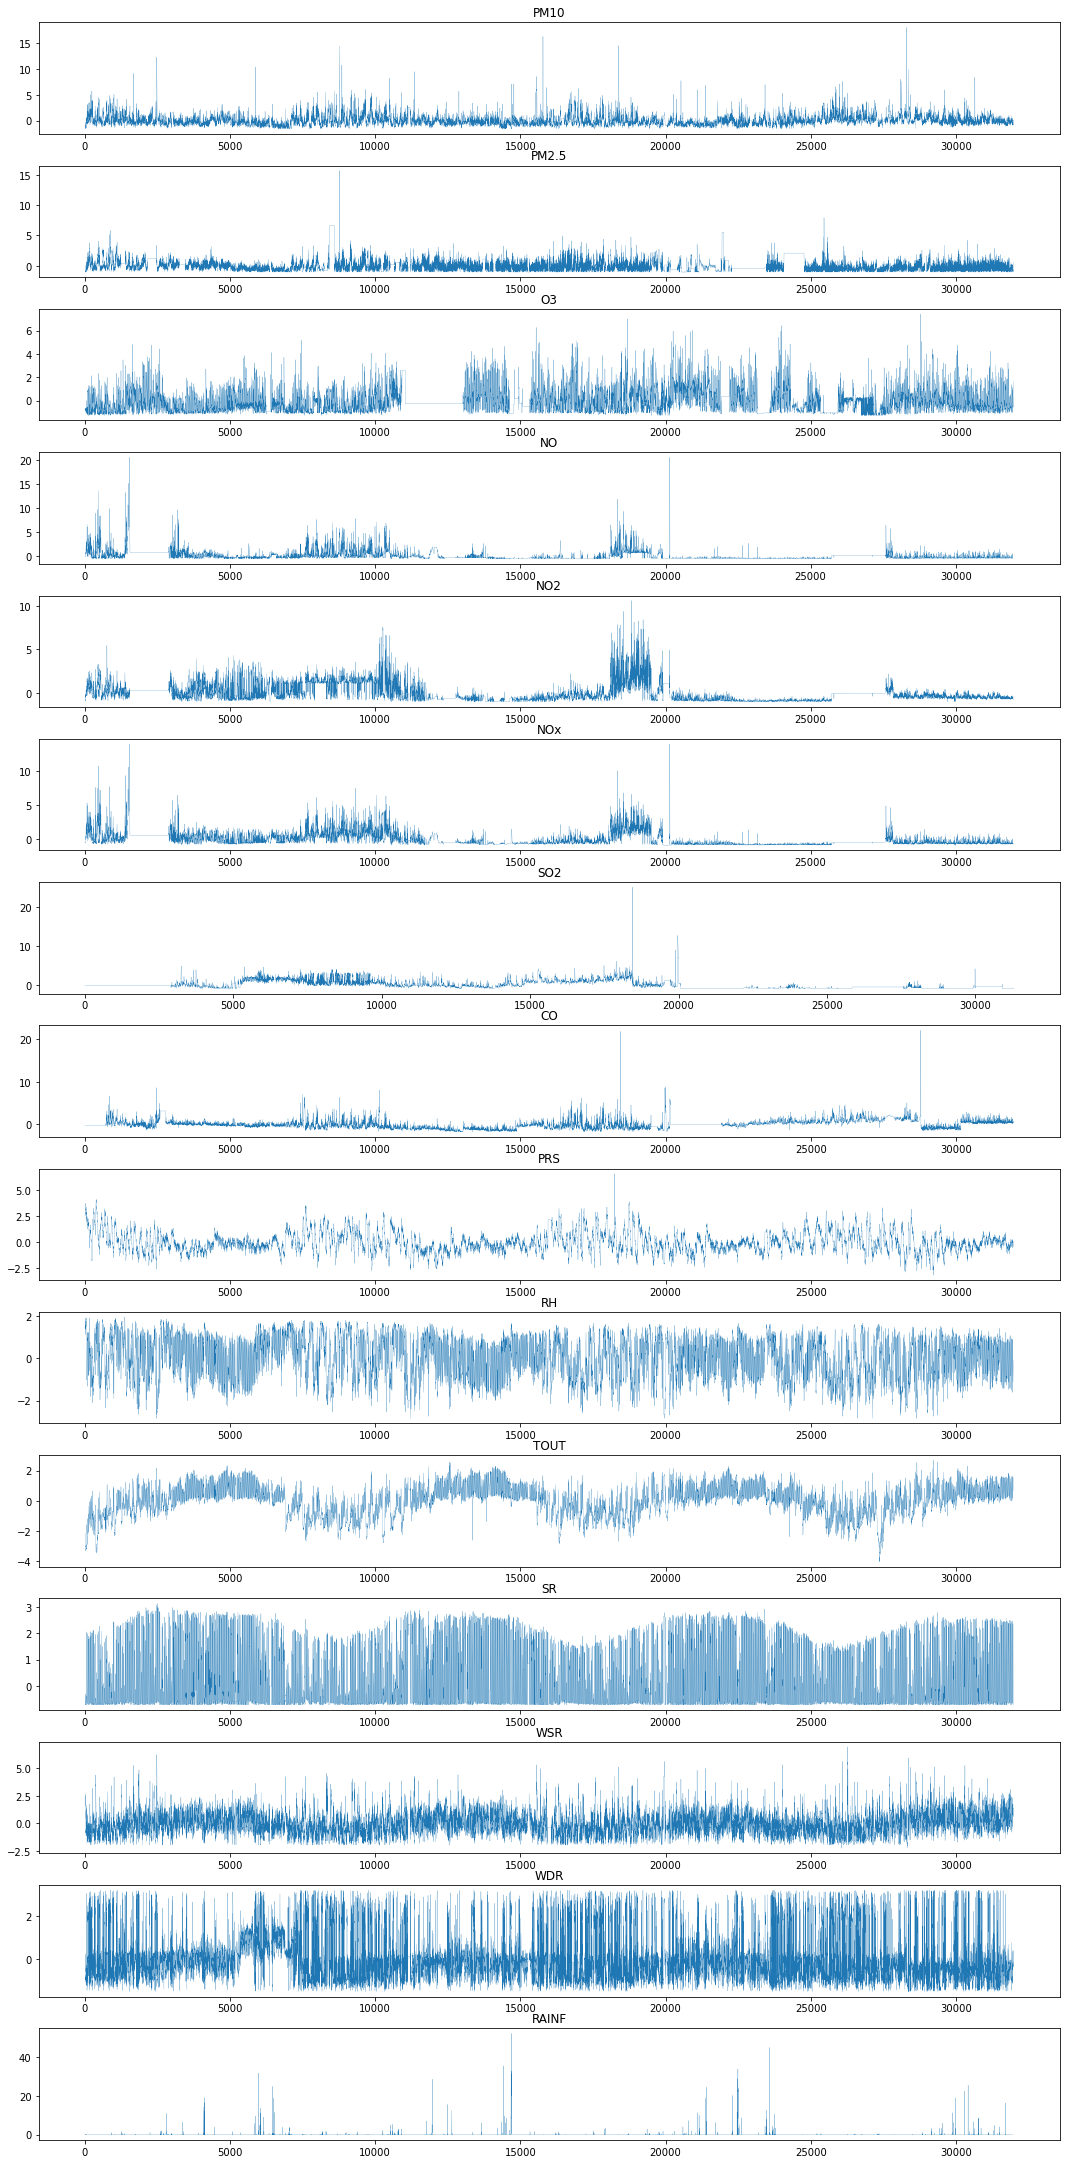

In [18]:
graficar(sdf)

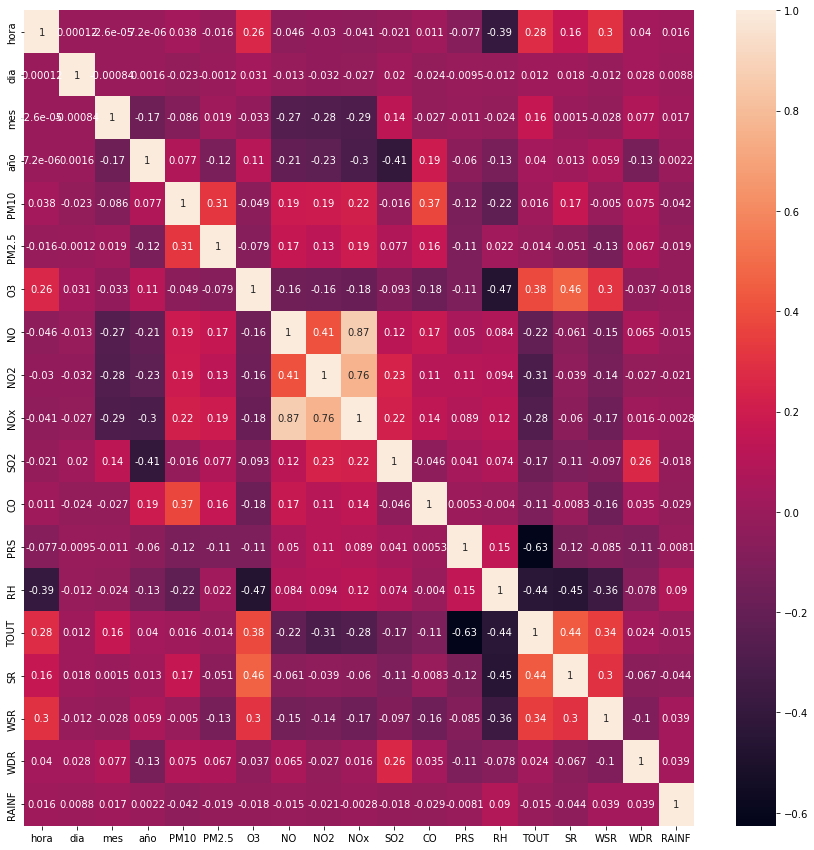

In [19]:
corr_df = sdf.corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

# Pruebas de Normalidad

In [20]:
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import kstest
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [21]:
df.fillna(method='ffill', inplace=True)

Normality Test PM10: 	KstestResult(statistic=0.9980872149835679, pvalue=0.0)
Normality Test PM2.5: 	KstestResult(statistic=0.9772498680518208, pvalue=0.0)
Normality Test O3: 	KstestResult(statistic=0.9871109187799278, pvalue=0.0)
Normality Test NO: 	KstestResult(statistic=0.7777431578915684, pvalue=0.0)
Normality Test NO2: 	KstestResult(statistic=0.8984456901795336, pvalue=0.0)
Normality Test NOx: 	KstestResult(statistic=0.9594051909501302, pvalue=0.0)
Normality Test SO2: 	KstestResult(statistic=0.6976795157737614, pvalue=0.0)
Normality Test CO: 	KstestResult(statistic=0.5659318273488056, pvalue=0.0)
Normality Test PRS: 	KstestResult(statistic=1.0, pvalue=0.0)
Normality Test RH: 	KstestResult(statistic=0.9989050977868741, pvalue=0.0)
Normality Test TOUT: 	KstestResult(statistic=0.9940595653760076, pvalue=0.0)
Normality Test SR: 	KstestResult(statistic=0.500398942213911, pvalue=0.0)
Normality Test WSR: 	KstestResult(statistic=0.9651968356284586, pvalue=0.0)
Normality Test WDR: 	KstestRe

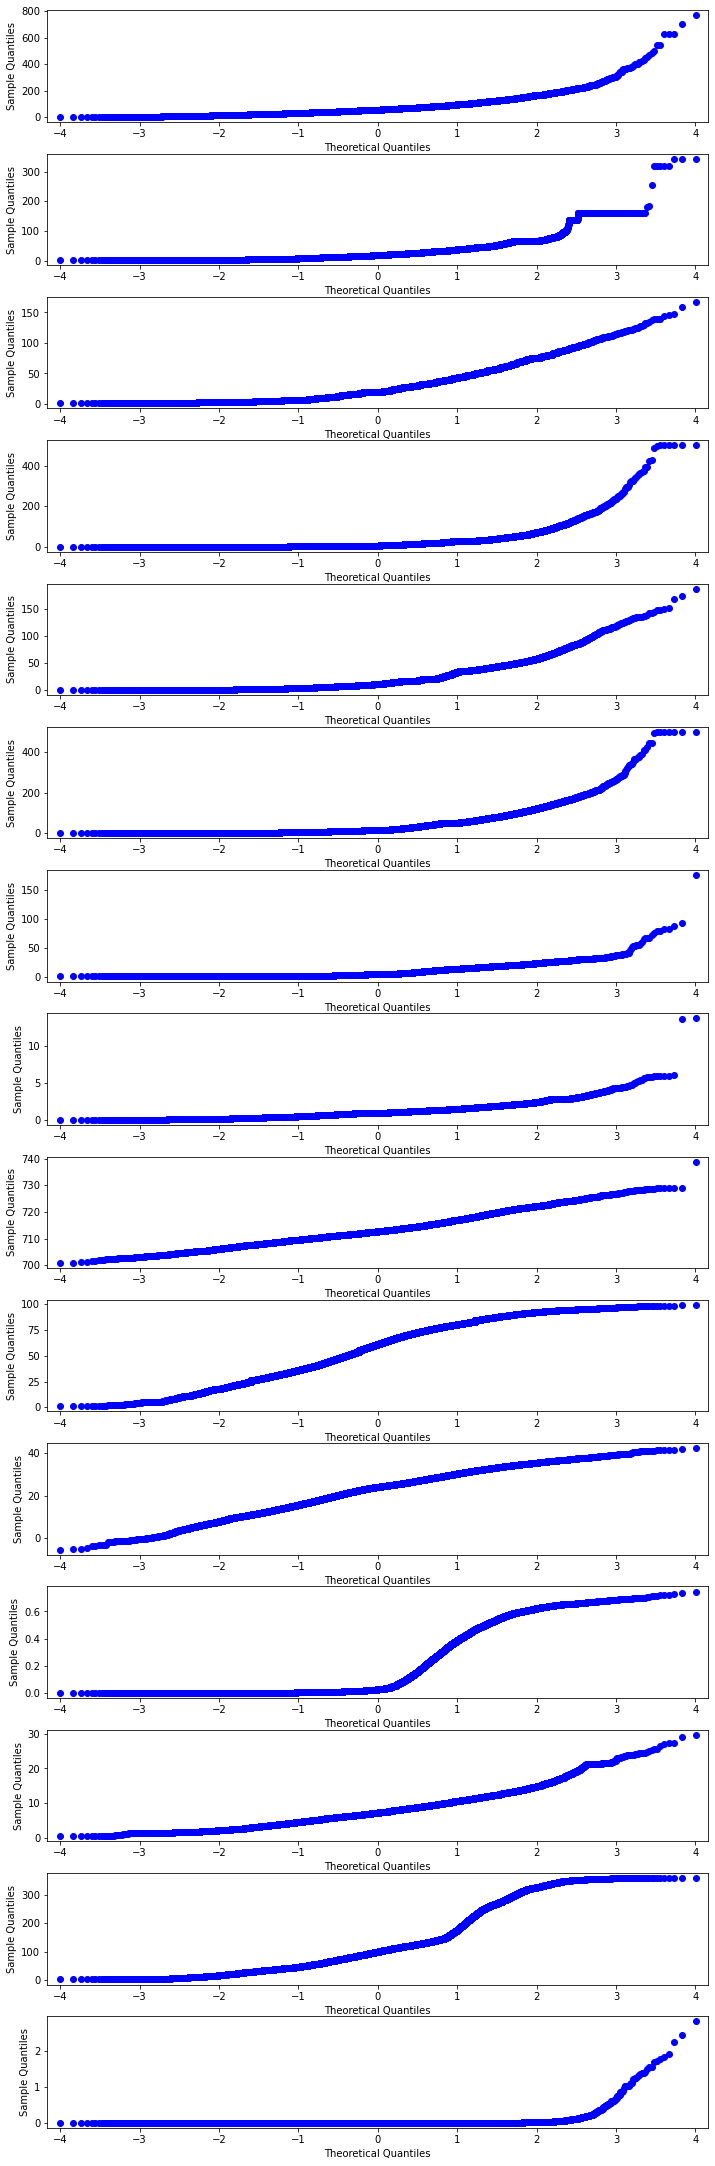

In [22]:
fig, ax = plt.subplots(15, figsize=(10,30))
fig.tight_layout()

iter = 0
for i in df.columns[4:]:
    print('Normality Test ' + str(i) + ': \t'+ str(kstest(df[i], 'norm')))
    sm.qqplot(df[i], ax = ax[iter])
    iter += 1

In [23]:
df.columns

Index(['hora', 'dia', 'mes', 'año', 'PM10', 'PM2.5', 'O3', 'NO', 'NO2', 'NOx',
       'SO2', 'CO', 'PRS', 'RH', 'TOUT', 'SR', 'WSR', 'WDR', 'RAINF'],
      dtype='object')

# Tranformando para ser normal

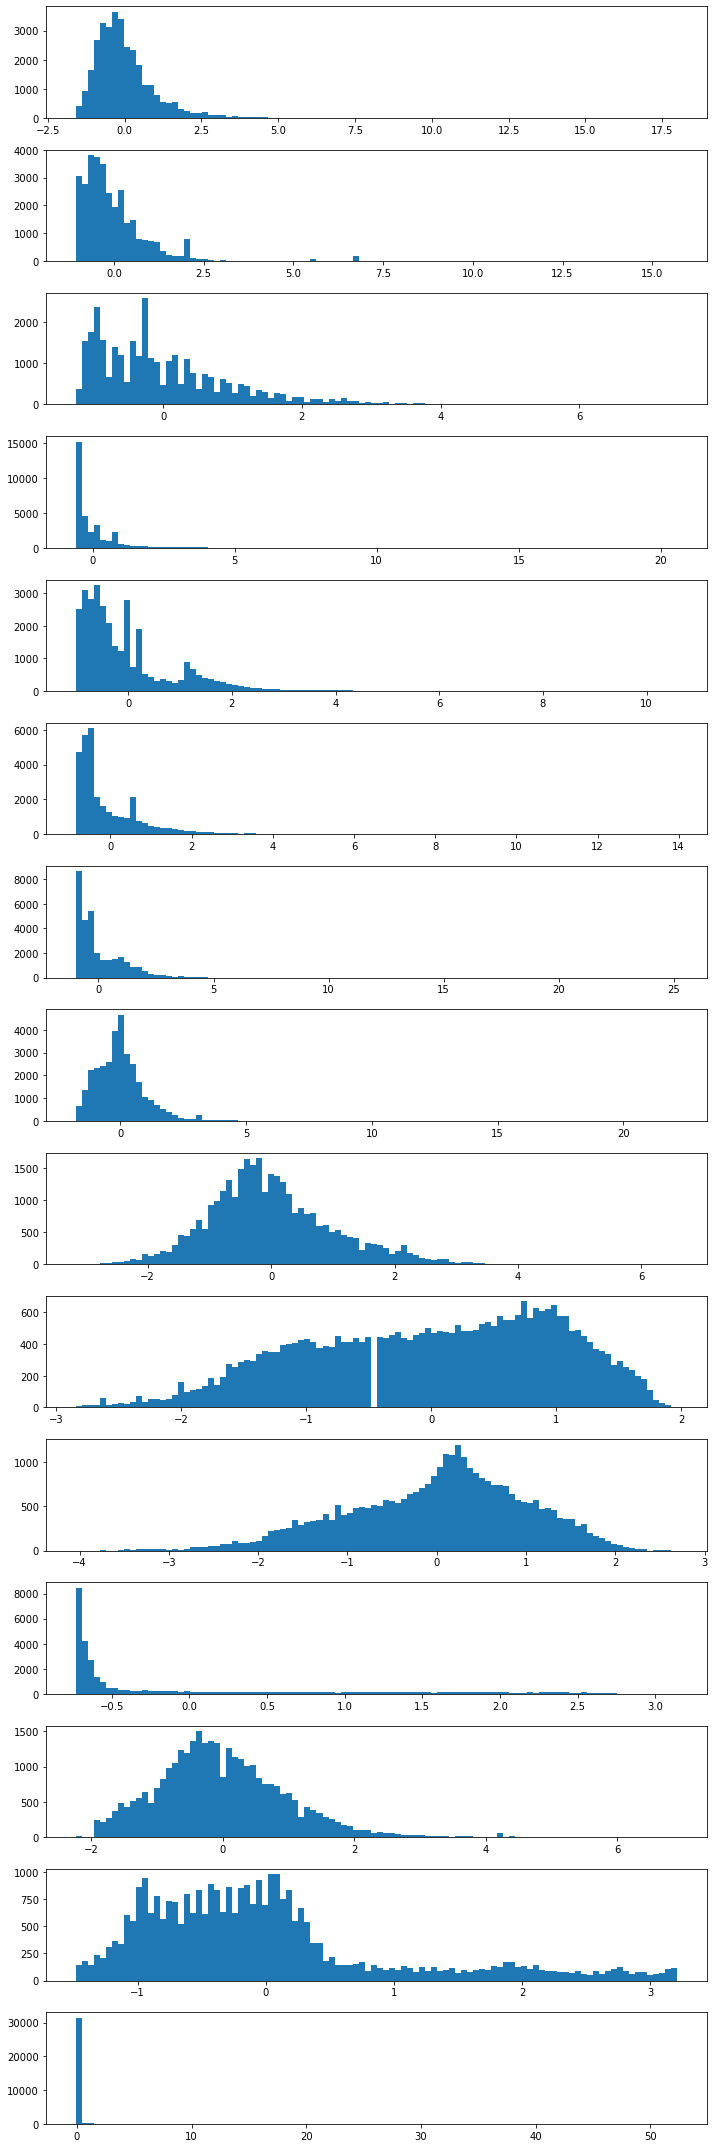

In [24]:
fig, ax = plt.subplots(15, figsize=(10,30))
fig.tight_layout()

iter = 0
for i in df.columns[4:]:
    ax[iter].hist(sdf[i], bins=100)
    iter += 1

In [25]:
from scipy import stats

df['TOUT'] += 10
df['RAINF'] += 1

normal_df = pd.DataFrame()
lambdas = []
for i in df.columns[4:]:  
    normal_df[i], fitted_lambda = stats.boxcox(df[i])
    lambdas.append(fitted_lambda)
    
df['TOUT'] -= 10
df['RAINF'] -= 1

normal_df['TOUT'] -= 10
df['RAINF'] -=1

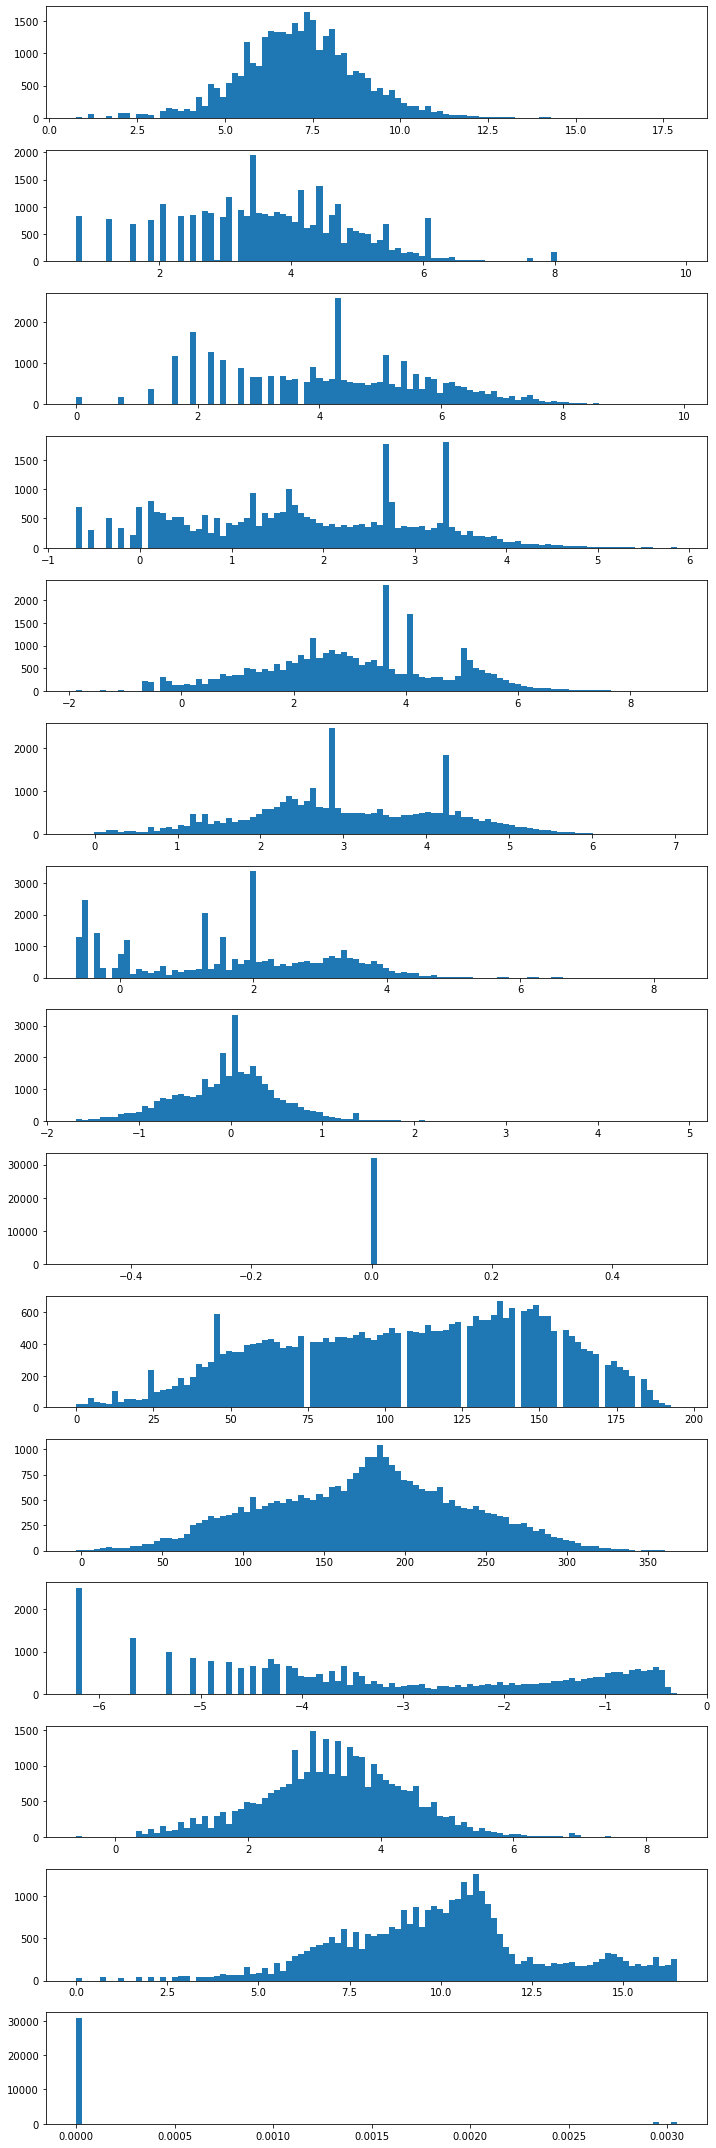

In [26]:
fig, ax = plt.subplots(15, figsize=(10,30))
fig.tight_layout()

iter = 0
for i in df.columns[4:]:
    ax[iter].hist(normal_df[i], bins=100)
    iter += 1

Normality Test PM10: 	KstestResult(statistic=0.9875939228095426, pvalue=0.0)
Normality Test PM2.5: 	KstestResult(statistic=0.8959452118940476, pvalue=0.0)
Normality Test O3: 	KstestResult(statistic=0.9258407697709274, pvalue=0.0)
Normality Test NO: 	KstestResult(statistic=0.5604451409482301, pvalue=0.0)
Normality Test NO2: 	KstestResult(statistic=0.7638244867904164, pvalue=0.0)
Normality Test NOx: 	KstestResult(statistic=0.8286163660219398, pvalue=0.0)
Normality Test SO2: 	KstestResult(statistic=0.5727776140090581, pvalue=0.0)
Normality Test CO: 	KstestResult(statistic=0.16834065909354956, pvalue=0.0)
Normality Test PRS: 	KstestResult(statistic=0.5033600645236025, pvalue=0.0)
Normality Test RH: 	KstestResult(statistic=0.9987195298008463, pvalue=0.0)
Normality Test TOUT: 	KstestResult(statistic=0.9996872850083123, pvalue=0.0)
Normality Test SR: 	KstestResult(statistic=0.6715622111194153, pvalue=0.0)
Normality Test WSR: 	KstestResult(statistic=0.8772034933203727, pvalue=0.0)
Normality Te

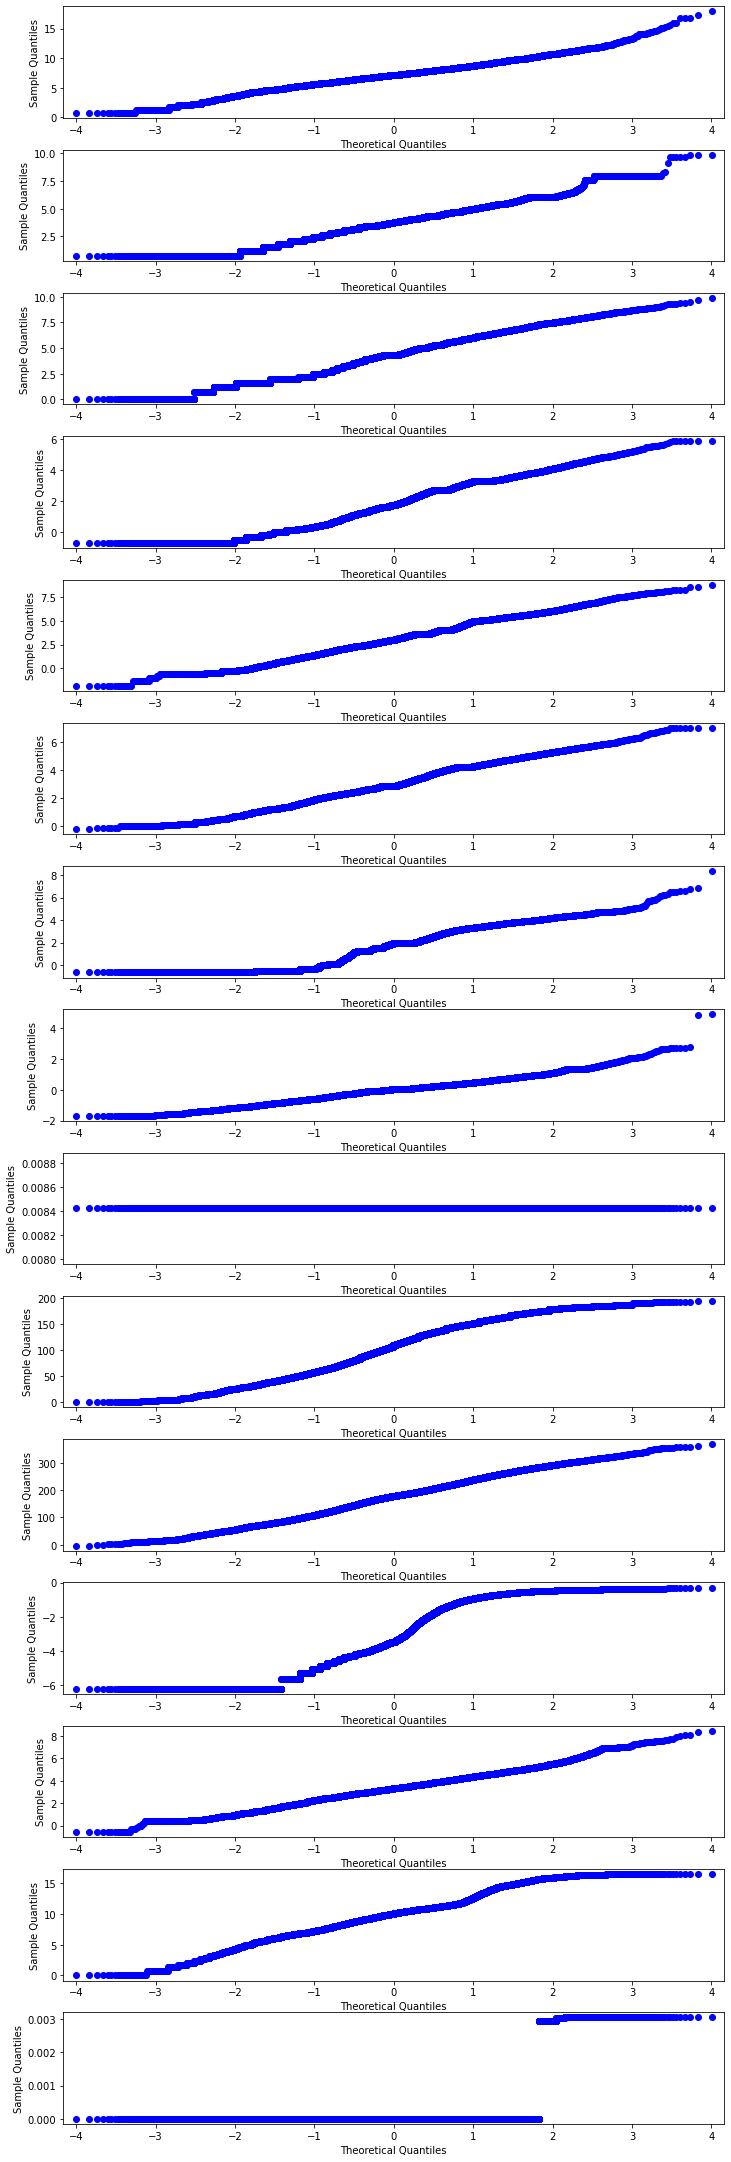

In [27]:
fig, ax = plt.subplots(15, figsize=(10,30))
fig.tight_layout()

iter = 0
for i in df.columns[4:]:
    print('Normality Test ' + str(i) + ': \t'+ str(kstest(normal_df[i], 'norm')))
    sm.qqplot(normal_df[i], ax = ax[iter])
    iter += 1

# PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(df[df.columns[4:]])

PCA(n_components=15)

In [29]:

components = pd.DataFrame(pca.components_).transpose()
components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.055494,0.594299,0.758678,-0.123489,-0.194258,0.022393,0.119283,0.006987,0.015565,0.001454,0.005012,-0.008802,-0.004999,0.000788,0.000024
1,0.022463,0.164952,0.095685,-0.192913,0.958234,-0.026564,-0.072969,0.018175,-0.031190,-0.004166,0.018618,-0.001898,-0.000854,-0.000550,0.000038
2,-0.010213,-0.083561,0.107335,0.643643,0.184524,-0.080269,0.721800,0.064376,-0.026626,-0.014358,-0.022157,0.007591,0.003541,0.002791,-0.000055
3,0.026322,0.396219,-0.310254,0.140795,0.001860,0.645476,0.019372,0.083128,-0.088541,-0.534300,0.055033,-0.076311,-0.011774,0.000768,0.000632
4,-0.002570,0.230937,-0.156618,0.024875,-0.052075,-0.733222,-0.051660,-0.044054,-0.176617,-0.577399,0.059529,-0.091378,-0.009888,0.001748,0.000652
5,0.016583,0.630260,-0.473232,0.159568,-0.024401,-0.157184,0.011005,-0.097627,0.100724,0.547518,-0.049042,0.075489,0.010327,-0.000616,-0.000642
6,0.023221,0.019839,-0.034808,-0.012044,0.013367,-0.096734,-0.003441,0.431611,0.880543,-0.153517,0.025695,-0.047483,0.006019,0.000080,0.000402
7,0.000370,0.003997,0.003096,-0.003486,-0.001086,0.002745,-0.002635,0.002770,-0.010942,-0.016203,-0.018372,-0.013817,0.999463,0.010048,-0.000253
8,-0.005782,0.000803,-0.020160,-0.016197,-0.023662,-0.020277,0.003180,0.390416,-0.207264,0.228815,0.380666,-0.778182,-0.003455,0.009599,0.000446
9,-0.023036,-0.002270,-0.229996,-0.685024,-0.060236,0.010128,0.674064,-0.116503,0.036090,-0.028277,0.053787,-0.025376,0.000933,-0.001129,-0.000297


In [30]:
values = list(pca.singular_values_/pca.singular_values_.sum())
values

[0.3047896643013084,
 0.1798091776913715,
 0.14481860441172703,
 0.09266657834163756,
 0.07450065539224573,
 0.05793517600512166,
 0.05445593228034432,
 0.02642231676008364,
 0.02403919753905569,
 0.016324167513909187,
 0.011537068818051645,
 0.009858944423968978,
 0.002033595351594583,
 0.0005986527367339082,
 0.00021026843284620414]

In [31]:
np.array(values).cumsum()

array([0.30478966, 0.48459884, 0.62941745, 0.72208402, 0.79658468,
       0.85451986, 0.90897579, 0.93539811, 0.9594373 , 0.97576147,
       0.98729854, 0.99715748, 0.99919108, 0.99978973, 1.        ])

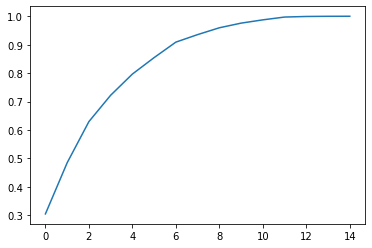

In [32]:
plt.plot(range(len(values)), list(np.array(values).cumsum()))

# Analisis de Factores
Pruebas de Barlet 
https://www.datacamp.com/tutorial/introduction-factor-analysis

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html


In [33]:
from factor_analyzer.factor_analyzer import calculate_kmo
var_df = df[df.columns[4:]]
kmo_all,kmo_model=calculate_kmo(var_df)


In [34]:
kmo_model

0.5459393494902401

In [35]:
from sklearn.datasets import load_iris
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation="varimax", n_factors=6)
fa.fit(var_df)



FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [36]:
ev, v = fa.get_eigenvalues()
v/v.sum()

array([ 3.93624022e-01,  2.46016311e-01,  1.22267873e-01,  1.03058371e-01,
        7.58218515e-02,  6.02026812e-02,  1.40338826e-02,  1.36827993e-02,
        7.88745364e-03,  4.44211334e-03,  3.47669507e-04, -4.57435751e-03,
       -6.88428170e-03, -1.31170665e-02, -1.68093219e-02])

In [37]:
(v/v.sum()).cumsum()

array([0.39362402, 0.63964033, 0.76190821, 0.86496658, 0.94078843,
       1.00099111, 1.01502499, 1.02870779, 1.03659524, 1.04103736,
       1.04138503, 1.03681067, 1.02992639, 1.01680932, 1.        ])

In [38]:
ev

array([3.35038427, 2.24075496, 1.46339676, 1.29807086, 1.09286745,
       0.99530257, 0.84943139, 0.74149232, 0.6997526 , 0.57552942,
       0.51819909, 0.49138371, 0.43380713, 0.22472635, 0.02490111])

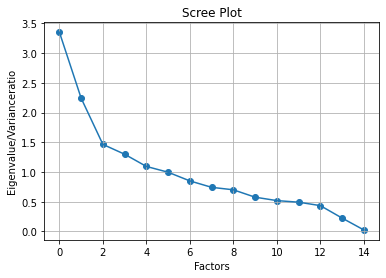

In [39]:
# create scree plot using matplotlib
plt.scatter (range(0, 15), ev)
plt.plot(range(0,15),ev)
plt.title( 'Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue/Varianceratio')
plt.grid()
plt. show()

In [40]:
comunalities = pd.DataFrame(fa.get_communalities(), index=var_df.columns)
comunalities

,0
PM10,0.693943
PM2.5,0.166714
O3,0.461899
NO,0.998546
NO2,0.777956
NOx,1.005518
SO2,0.305775
CO,0.263771
PRS,0.511457
RH,0.578008


In [41]:
fa_loading_matrix = pd.DataFrame(fa.loadings_, columns=['FA{}'.format(i) for i in range(0, 5+1)], index=var_df.columns)
fa_loading_matrix[ 'Highest loading' ] = fa_loading_matrix.idxmax(axis=1)
fa_loading_matrix = fa_loading_matrix.sort_values('Highest loading')
fa_loading_matrix

,FA0,FA1,FA2,FA3,FA4,FA5,Highest loading
O3,0.649662,-0.055973,0.073988,-0.071877,-0.160793,-0.014484,FA0
SR,0.650620,-0.004449,0.124430,0.020443,0.066207,-0.106673,FA0
WSR,0.466132,-0.067727,0.096474,-0.049668,-0.133477,-0.118361,FA0
NO,-0.089968,0.961531,-0.053775,0.164233,0.175817,0.071650,FA1
NOx,-0.095445,0.739839,-0.070447,0.639491,0.171669,0.075261,FA1
TOUT,0.477292,-0.081849,0.851002,-0.155421,-0.079090,-0.081133,FA2
RAINF,-0.059923,0.000896,0.018751,-0.017665,-0.059982,0.008606,FA2
NO2,-0.069793,0.247400,-0.125208,0.816898,0.159264,0.059282,FA3
PRS,-0.071252,0.025868,-0.700898,0.041745,-0.088193,-0.070231,FA3
RH,-0.729768,0.032235,-0.109513,0.074254,-0.137030,-0.090130,FA3


[Text(0, 0.5, 'FA0'),
 Text(0, 1.5, 'FA1'),
 Text(0, 2.5, 'FA2'),
 Text(0, 3.5, 'FA3'),
 Text(0, 4.5, 'FA4'),
 Text(0, 5.5, 'FA5')]

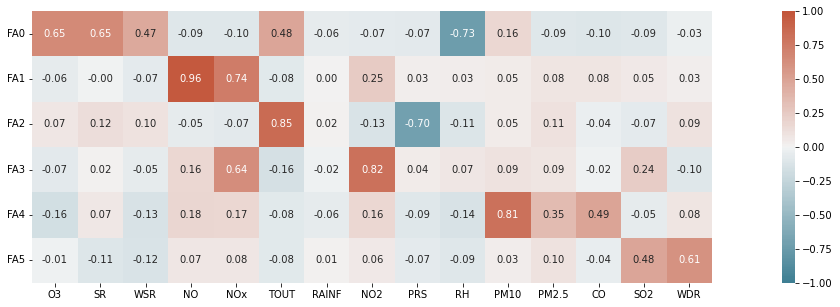

In [42]:
import seaborn as sns

plt.figure(figsize=(25,5))

# plot the heatmap for correlation matrix
ax = sns.heatmap(fa_loading_matrix.drop('Highest loading', 
                 axis=1).T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0)

In [54]:
factor_df = pd.DataFrame(fa.fit_transform(var_df))
factor_df.rename(columns = {0:'F0', 1:'F1', 2:'F2', 3:'F3', 4:'F4', 5:'F5'}, inplace=True)
# factor_df.columns
factor_df.to_csv('PruebasRNN\datosFactores.csv')

# Dierios

In [68]:
from factor_analyzer.factor_analyzer import calculate_kmo
day_var_df = day_df
day_var_df
# kmo_all,kmo_model=calculate_kmo(day_var_df)
# kmo_model

,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
date,,,,,,,,,,,,,,,
2018-01-01,16.708333,7.833333,10.500000,20.170833,6.775000,26.604167,5.6,0.920000,725.358333,90.708333,2.910833,0.022583,11.775000,51.291667,0.001250
2018-01-02,31.333333,13.708333,7.375000,42.754167,17.204167,59.037500,5.6,0.920000,723.241667,95.541667,0.858750,0.016417,6.308333,75.250000,0.001667
2018-01-03,60.583333,16.666667,10.916667,62.720833,22.862500,84.795833,5.6,0.920000,723.762500,73.375000,4.810000,0.109875,6.875000,71.125000,0.000000
2018-01-04,87.583333,29.500000,16.083333,60.962500,26.304167,86.033333,5.6,0.920000,720.462500,55.125000,8.817500,0.144083,6.054167,173.750000,0.000000
2018-01-05,82.083333,29.208333,16.333333,36.108333,29.508333,65.400000,5.6,0.920000,720.233333,65.083333,11.551667,0.117500,5.758333,95.208333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-21,45.750000,10.208333,19.166667,5.533333,7.491667,11.020833,NaN,1.455417,711.550000,64.125000,27.216250,0.173208,11.641667,80.125000,0.000000
2021-08-22,53.000000,12.041667,22.333333,3.604167,6.137500,7.733333,NaN,1.319583,712.862500,57.208333,28.078750,0.201125,11.820833,94.041667,0.000000
2021-08-23,67.208333,13.166667,21.958333,5.991667,8.275000,12.250000,NaN,1.439583,712.937500,52.166667,28.672917,0.195292,9.983333,79.375000,0.000000


In [77]:
from sklearn.datasets import load_iris
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation="varimax", n_factors=6)
fa.fit(day_var_df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [70]:
ev, v = fa.get_eigenvalues()
v/v.sum()

array([ 3.16141408e-01,  2.02777497e-01,  1.15966982e-01,  1.02834000e-01,
        9.00346342e-02,  4.88403546e-02,  4.08979689e-02,  3.35412488e-02,
        2.18706123e-02,  1.18423085e-02,  8.29497486e-03,  3.11735736e-03,
        2.28302892e-03,  1.56117388e-03, -3.54917462e-06])

In [71]:
(v/v.sum()).cumsum()

array([0.31614141, 0.51891891, 0.63488589, 0.73771989, 0.82775452,
       0.87659488, 0.91749284, 0.95103409, 0.97290471, 0.98474701,
       0.99304199, 0.99615935, 0.99844238, 1.00000355, 1.        ])

In [72]:
ev

array([3.41500676, 2.32560443, 1.57085991, 1.36532279, 1.23384993,
       0.97726425, 0.91179675, 0.79664135, 0.55941548, 0.53829421,
       0.38893626, 0.38532864, 0.29822322, 0.21377696, 0.01967906])

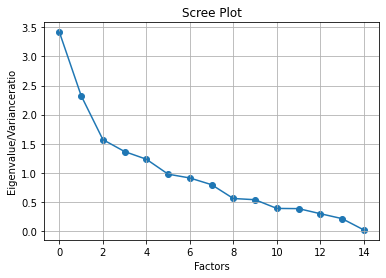

In [73]:
# create scree plot using matplotlib
plt.scatter (range(0, 15), ev)
plt.plot(range(0,15),ev)
plt.title( 'Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue/Varianceratio')
plt.grid()
plt. show()

In [78]:
comunalities = pd.DataFrame(fa.get_communalities(), index=var_df.columns)
comunalities

,0
PM10,0.649938
PM2.5,0.163534
O3,0.196515
NO,0.737670
NO2,0.614782
NOx,1.052974
SO2,0.554050
CO,0.373845
PRS,0.623078
RH,0.772474


In [79]:
fa_loading_matrix = pd.DataFrame(fa.loadings_, columns=['FA{}'.format(i) for i in range(0, 6)], index=var_df.columns)
fa_loading_matrix[ 'Highest loading' ] = fa_loading_matrix.idxmax(axis=1)
fa_loading_matrix = fa_loading_matrix.sort_values('Highest loading')
fa_loading_matrix

,FA0,FA1,FA2,FA3,FA4,FA5,Highest loading
NO,0.842784,-0.051893,-0.040529,0.129366,-0.064074,0.047003,FA0
NO2,0.689120,-0.152377,-0.078726,0.133343,0.299910,-0.052468,FA0
NOx,1.005202,-0.074629,-0.087122,0.088713,0.146392,-0.009071,FA0
PRS,0.029386,-0.773091,-0.048368,-0.137468,-0.011845,-0.056278,FA0
RH,0.034767,-0.034757,-0.851752,-0.209920,0.004075,-0.022203,FA0
TOUT,-0.217636,0.856019,0.244451,-0.131123,-0.120303,0.047632,FA1
O3,-0.102764,0.100040,0.362844,-0.206731,-0.039406,-0.000403,FA2
SR,-0.051009,0.504537,0.653018,-0.118423,-0.092550,-0.001620,FA2
WSR,-0.078395,0.154909,0.231901,-0.308801,-0.153085,-0.067070,FA2
PM10,0.162870,0.094331,0.231385,0.745408,-0.000953,-0.073076,FA3


[Text(0, 0.5, 'FA0'),
 Text(0, 1.5, 'FA1'),
 Text(0, 2.5, 'FA2'),
 Text(0, 3.5, 'FA3'),
 Text(0, 4.5, 'FA4'),
 Text(0, 5.5, 'FA5')]

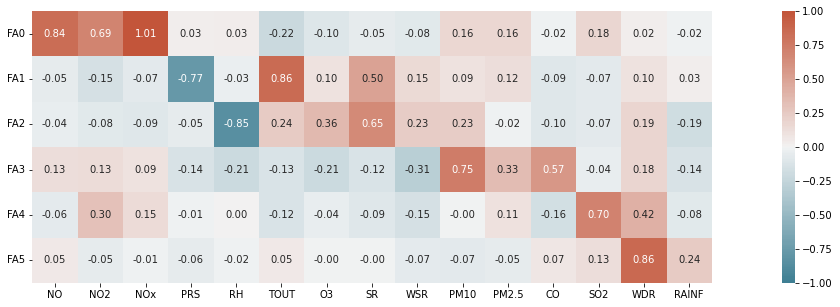

In [80]:
import seaborn as sns

plt.figure(figsize=(25,5))

# plot the heatmap for correlation matrix
ax = sns.heatmap(fa_loading_matrix.drop('Highest loading', 
                 axis=1).T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0)

In [85]:
day_var_df.isna().describe()

,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
count,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333


In [86]:
day_factor_df = pd.DataFrame(fa.fit_transform(day_var_df))
day_factor_df.rename(columns = {0:'F0', 1:'F1', 2:'F2', 3:'F3', 4:'F4', 5:'F5'}, inplace=True)
# factor_df.columns
day_factor_df.to_csv('PruebasRNN\datosFactoresDias.csv')